In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv("Speed_Dating_Data.csv", encoding="ISO-8859-1")
iid_group = dataset.groupby(by=["iid"])
gender_group = dataset.groupby(by=["gender"])

In [3]:
# Attribute list for 'How do you think others perceive you'
atr_list_1 = ['attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']
# Attribute list for 'How do you think you measure up'
atr_list_2 = ['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']
# Attribute list for 'What do you look for in the opposite sex'
atr_list_3 = ['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2']

In [4]:
# Separates data into male and female groupings
f_group = gender_group.get_group(0)
female_group = f_group.groupby(by=["iid"])
m_group = gender_group.get_group(1)
male_group = m_group.groupby(by=['iid'])

# Female standard within sample size of males in the five attributes
f_standard = np.zeros(len(atr_list_3))
f_total = np.zeros(len(atr_list_3))
# Male standard within sample size of females in the five attributes
m_standard = np.zeros(len(atr_list_3))
m_total = np.zeros(len(atr_list_3))

# Get female standard
for subject in female_group:
    
    for i in range(len(atr_list_3)):
        if np.isnan(subject[1][atr_list_3[i]].iat[0]):
            continue
        f_standard[i] += subject[1][atr_list_3[i]].iat[0]
        f_total[i] += 1
    
for i in range(f_standard.shape[0]):
    f_standard[i] = f_standard[i]/f_total[i]/100
    
# Get male standard
for subject in male_group:
        
    for i in range(len(atr_list_3)):
        if np.isnan(subject[1][atr_list_3[i]].iat[0]):
            continue
        m_standard[i] += subject[1][atr_list_3[i]].iat[0]
        m_total[i] += 1
    
for i in range(m_standard.shape[0]):
    m_standard[i] = m_standard[i]/m_total[i]/100
    
print(f_standard)
print(m_standard)

[0.27984127 0.15129032 0.15920635 0.1784127  0.08274194]
[0.35714286 0.12903226 0.1568254  0.18984127 0.06370968]


In [5]:
# Arrays for input and output variables
X_without_weight = []
X_with_weight = []
Y = []

In [6]:
# Insert data into input and output var arrays
for subject in iid_group:
    if np.isnan(subject[1]['attr5_2'].iat[0]) or\
        np.isnan(subject[1]['attr3_2'].iat[0]) or\
        np.isnan(subject[1]['them_cal'].iat[0]):
        continue
        
    x_without_to_insert = []
    x_with_to_insert = []
    
    for i in range(len(atr_list_1)):
        x_without_to_insert.append(subject[1][atr_list_1[i]].iat[0])
        x_without_to_insert.append(subject[1][atr_list_2[i]].iat[0])
        x_with_to_insert.append(subject[1][atr_list_1[i]].iat[0])
        x_with_to_insert.append(subject[1][atr_list_2[i]].iat[0])
        
    for i in range(len(atr_list_1)):
        if subject[1]['gender'].iat[0] == 0:
            x_with_to_insert[i] * f_standard[i]
            x_with_to_insert[i+5] * f_standard[i]
        elif subject[1]['gender'].iat[0] == 1:
            x_with_to_insert[i] * m_standard[i]
            x_with_to_insert[i+5] * m_standard[i]
            
    X_without_weight.append(x_without_to_insert)
    X_with_weight.append(x_with_to_insert)
    
    if subject[1]['them_cal'].iat[0] == 0:
        Y.append(0)
    else:
        Y.append(1)
        
X_without_weight = np.array(X_without_weight)
X_with_weight = np.array(X_with_weight)
Y = np.array(Y)

In [7]:
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# Split data
X_withoutSTD_train, X_withoutSTD_test, Y_withoutSTD_train\
    , Y_withoutSTD_test = train_test_split(X_without_weight, Y, random_state = 0)
X_withSTD_train, X_withSTD_test, Y_withSTD_train, Y_withSTD_test\
    = train_test_split(X_with_weight, Y, random_state = 0)

In [9]:
# Logistic regression with L1 Lasso
def logreg_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg, acc_test_logreg, c_logreg):
    
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    logreg.fit(X_train, Y_train)
    
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("C = %f" % c)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print()
    
    c_logreg.append(c)

X without weight:
C = 0.000100
Accuracy on training data = 0.455556
Accuracy on test data = 0.483871

C = 0.001000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.010000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.100000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 1.000000
Accuracy on training data = 0.633333
Accuracy on test data = 0.612903

C = 10.000000
Accuracy on training data = 0.611111
Accuracy on test data = 0.580645

C = 100.000000
Accuracy on training data = 0.611111
Accuracy on test data = 0.580645

X with weight:
C = 0.000100
Accuracy on training data = 0.455556
Accuracy on test data = 0.483871

C = 0.001000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.010000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.100000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 1.000000
Accuracy on training data =

C:\Users\marci\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


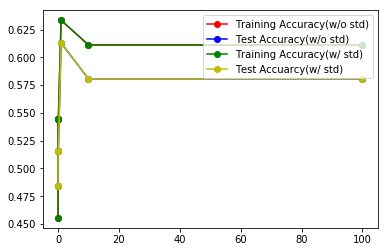

In [10]:
# Call Logistic Regression with L1 Lasso with different c param
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# X without weight
print('X without weight:')
for i in range(len(c)):
    logreg_model(c[i], X_withoutSTD_train, Y_withoutSTD_train, X_withoutSTD_test, Y_withoutSTD_test, acc_train_logreg, acc_test_logreg, c_logreg)

acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# X with weight
print('X with weight:')
for i in range(len(c)):
    logreg_model(c[i], X_withSTD_train, Y_withSTD_train, X_withSTD_test, Y_withSTD_test, acc_train_logreg2, acc_test_logreg2, c_logreg2)

plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.plot(c_logreg, acc_train_logreg2, 'go-')
plt.plot(c_logreg, acc_test_logreg2, 'yo-')
plt.legend(['Training Accuracy(w/o std)', 'Test Accuracy(w/o std)', 'Training Accuracy(w/ std)', 'Test Accuarcy(w/ std)'], loc='upper right')


In [11]:
# Logistic regression with L2 Ridge
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg, acc_test_logreg, c_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)
    
    # Fit the model on the training set.
    logreg2.fit(X_train, Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("C = %f" % c)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction and accuracy on test set.
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print()
    
    c_logreg.append(c)

X without weight:
C = 0.000100
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.001000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.010000
Accuracy on training data = 0.588889
Accuracy on test data = 0.548387

C = 0.100000
Accuracy on training data = 0.666667
Accuracy on test data = 0.580645

C = 1.000000
Accuracy on training data = 0.622222
Accuracy on test data = 0.580645

C = 10.000000
Accuracy on training data = 0.633333
Accuracy on test data = 0.612903

C = 100.000000
Accuracy on training data = 0.644444
Accuracy on test data = 0.612903

X with weight:
C = 0.000100
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.001000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.010000
Accuracy on training data = 0.588889
Accuracy on test data = 0.548387

C = 0.100000
Accuracy on training data = 0.666667
Accuracy on test data = 0.580645

C = 1.000000
Accuracy on training data =

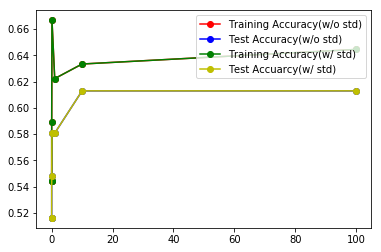

In [12]:
# Call Logistic Regression with L2 Lasso with different c param
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_logreg3 = []
acc_test_logreg3 = []
c_logreg3 = []

# X without weight
print('X without weight:')
for i in range(len(c)):
    logreg2_model(c[i], X_withoutSTD_train, Y_withoutSTD_train, X_withoutSTD_test, Y_withoutSTD_test, acc_train_logreg3, acc_test_logreg3, c_logreg3)

acc_train_logreg4 = []
acc_test_logreg4 = []
c_logreg4 = []

# X with weight
print('X with weight:')
for i in range(len(c)):
    logreg2_model(c[i], X_withSTD_train, Y_withSTD_train, X_withSTD_test, Y_withSTD_test, acc_train_logreg4, acc_test_logreg4, c_logreg4)

plt.plot(c_logreg, acc_train_logreg3, 'ro-') 
plt.plot(c_logreg, acc_test_logreg3,'bo-') 
plt.plot(c_logreg, acc_train_logreg4, 'go-')
plt.plot(c_logreg, acc_test_logreg4, 'yo-')
plt.legend(['Training Accuracy(w/o std)', 'Test Accuracy(w/o std)', 'Training Accuracy(w/ std)', 'Test Accuarcy(w/ std)'], loc='upper right')

In [13]:
# Polynomial transform X's
poly = PolynomialFeatures(degree=2)
X_withoutSTD_transformed_train = poly.fit_transform(X_withoutSTD_train)
X_withoutSTD_transformed_test = poly.fit_transform(X_withoutSTD_test)
X_withSTD_transformed_train = poly.fit_transform(X_withSTD_train)
X_withSTD_transformed_test = poly.fit_transform(X_withSTD_test)

X without weight:
C = 0.000100
Accuracy on training data = 0.455556
Accuracy on test data = 0.483871

C = 0.001000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.010000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.100000
Accuracy on training data = 0.655556
Accuracy on test data = 0.580645

C = 1.000000
Accuracy on training data = 0.644444
Accuracy on test data = 0.612903

C = 10.000000
Accuracy on training data = 0.644444
Accuracy on test data = 0.612903

C = 100.000000
Accuracy on training data = 0.644444


C:\Users\marci\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on test data = 0.612903

X with weight:
C = 0.000100
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.001000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.010000
Accuracy on training data = 0.544444
Accuracy on test data = 0.516129

C = 0.100000
Accuracy on training data = 0.655556
Accuracy on test data = 0.580645

C = 1.000000
Accuracy on training data = 0.644444
Accuracy on test data = 0.645161

C = 10.000000
Accuracy on training data = 0.633333
Accuracy on test data = 0.612903

C = 100.000000
Accuracy on training data = 0.644444
Accuracy on test data = 0.645161



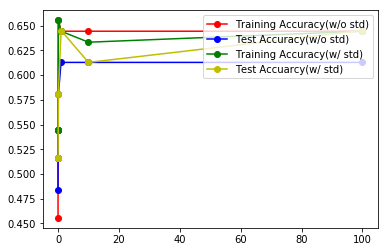

In [14]:
# Call logistic regression with polynomial transformed features
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# X without weight
print('X without weight:')
for i in range(len(c)):
    logreg_model(c[i], X_withoutSTD_transformed_train, Y_withoutSTD_train, X_withoutSTD_transformed_test, Y_withoutSTD_test, acc_train_logreg, acc_test_logreg, c_logreg)

acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# X with weight
print('X with weight:')
for i in range(len(c)):
    logreg_model(c[i], X_withSTD_transformed_train, Y_withSTD_train, X_withSTD_transformed_test, Y_withSTD_test, acc_train_logreg2, acc_test_logreg2, c_logreg2)

plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.plot(c_logreg, acc_train_logreg2, 'go-')
plt.plot(c_logreg, acc_test_logreg2, 'yo-')
plt.legend(['Training Accuracy(w/o std)', 'Test Accuracy(w/o std)', 'Training Accuracy(w/ std)', 'Test Accuarcy(w/ std)'], loc='upper right')

X without weight:
C = 0.000100
Accuracy on training data = 0.644444
Accuracy on test data = 0.548387

C = 0.001000
Accuracy on training data = 0.633333
Accuracy on test data = 0.645161

C = 0.010000
Accuracy on training data = 0.700000
Accuracy on test data = 0.548387

C = 0.100000
Accuracy on training data = 0.811111
Accuracy on test data = 0.483871

C = 1.000000
Accuracy on training data = 0.900000
Accuracy on test data = 0.516129

C = 10.000000
Accuracy on training data = 0.955556
Accuracy on test data = 0.580645

C = 100.000000
Accuracy on training data = 1.000000
Accuracy on test data = 0.580645

X with weight:
C = 0.000100
Accuracy on training data = 0.644444
Accuracy on test data = 0.548387

C = 0.001000
Accuracy on training data = 0.633333
Accuracy on test data = 0.645161

C = 0.010000
Accuracy on training data = 0.700000
Accuracy on test data = 0.548387

C = 0.100000
Accuracy on training data = 0.811111
Accuracy on test data = 0.483871

C = 1.000000
Accuracy on training data =

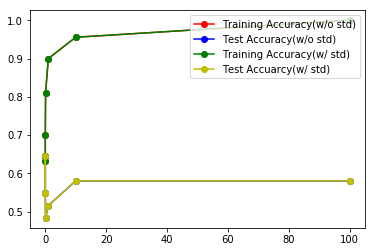

In [15]:
# Call Logistic Regression with L2 Lasso with different c param
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_logreg3 = []
acc_test_logreg3 = []
c_logreg3 = []

# X without weight
print('X without weight:')
for i in range(len(c)):
    logreg2_model(c[i], X_withoutSTD_transformed_train, Y_withoutSTD_train, X_withoutSTD_transformed_test, Y_withoutSTD_test, acc_train_logreg3, acc_test_logreg3, c_logreg3)

acc_train_logreg4 = []
acc_test_logreg4 = []
c_logreg4 = []

# X with weight
print('X with weight:')
for i in range(len(c)):
    logreg2_model(c[i], X_withSTD_transformed_train, Y_withSTD_train, X_withSTD_transformed_test, Y_withSTD_test, acc_train_logreg4, acc_test_logreg4, c_logreg4)

plt.plot(c_logreg, acc_train_logreg3, 'ro-') 
plt.plot(c_logreg, acc_test_logreg3,'bo-') 
plt.plot(c_logreg, acc_train_logreg4, 'go-')
plt.plot(c_logreg, acc_test_logreg4, 'yo-')
plt.legend(['Training Accuracy(w/o std)', 'Test Accuracy(w/o std)', 'Training Accuracy(w/ std)', 'Test Accuarcy(w/ std)'], loc='upper right')

In [16]:
from sklearn import svm

In [17]:
# SVM with RBF kernel
def svm_linear(c, X_tr, Y_tr, X_te, Y_te, acc_train_svm, acc_test_svm, c_svm):
    svc = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    svc.fit(X_tr, Y_tr)
    
    Yhat_svc_linear_train = svc.predict(X_tr)
    acc_train = np.mean(Yhat_svc_linear_train == Y_tr)
    acc_train_svm.append(acc_train)
    print('C = %f' % c)
    print('Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc.predict(X_te)
    acc_test = np.mean(Yhat_svc_linear_test == Y_te)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    print()
    
    c_svm.append(c)

X without weight:
C = 0.000100
Accuracy = 0.544444
Accuracy = 0.516129

C = 0.001000
Accuracy = 0.544444
Accuracy = 0.516129

C = 0.010000
Accuracy = 0.544444
Accuracy = 0.516129

C = 0.100000
Accuracy = 0.544444
Accuracy = 0.516129

C = 1.000000
Accuracy = 0.877778
Accuracy = 0.709677

C = 10.000000
Accuracy = 1.000000
Accuracy = 0.677419

C = 100.000000
Accuracy = 1.000000
Accuracy = 0.709677

X with weight:
C = 0.000100
Accuracy = 0.544444
Accuracy = 0.516129

C = 0.001000
Accuracy = 0.544444
Accuracy = 0.516129

C = 0.010000
Accuracy = 0.544444
Accuracy = 0.516129

C = 0.100000
Accuracy = 0.544444
Accuracy = 0.516129

C = 1.000000
Accuracy = 0.877778
Accuracy = 0.709677

C = 10.000000
Accuracy = 1.000000
Accuracy = 0.677419

C = 100.000000
Accuracy = 1.000000
Accuracy = 0.709677



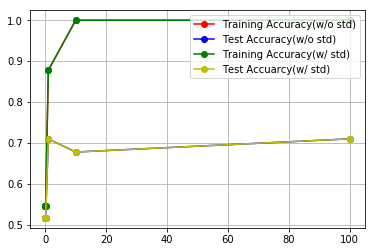

In [18]:
acc_train_svm = []
acc_test_svm = []
c_svm = []

# X without weight
print('X without weight:')
for i in range(len(c)):
    svm_linear(c[i], X_withoutSTD_train, Y_withoutSTD_train, X_withoutSTD_test, Y_withoutSTD_test, acc_train_svm, acc_test_svm, c_svm)

acc_train_svm2 = []
acc_test_svm2 = []
c_svm2 = []

# X with weight
print('X with weight:')
for i in range(len(c)):
    svm_linear(c[i], X_withSTD_train, Y_withSTD_train, X_withSTD_test, Y_withSTD_test, acc_train_svm2, acc_test_svm2, c_svm2)
    
plt.plot(c_svm, acc_train_svm, 'ro-')
plt.plot(c_svm, acc_test_svm, 'bo-')
plt.plot(c_svm2, acc_train_svm2, 'go-')
plt.plot(c_svm2, acc_test_svm2, 'yo-')
plt.grid()
plt.legend(['Training Accuracy(w/o std)', 'Test Accuracy(w/o std)', 'Training Accuracy(w/ std)', 'Test Accuarcy(w/ std)'], loc='upper right')

In [19]:
# SVM with polynomial kernel
def svm_polynomial(c, X_tr, X_te, Y_tr, Y_te, acc_train_svm_poly, acc_test_svm_poly, c_svm_poly):
    
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    svc_polynomial.fit(X_tr, Y_tr)
    
    Yhat_svc_polynomial_train = svc_polynomial.predict(X_tr)
    acc_train = np.mean(Yhat_svc_polynomial_train == Y_tr)
    acc_train_svm_poly.append(acc_train)
    print('C = %f' % c)
    print('Accuracy = {0:f}'.format(acc_train))

    Yhat_svc_polynomial_test = svc_polynomial.predict(X_te)
    acc_test = np.mean(Yhat_svc_polynomial_test == Y_te)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    print()
    
    c_svm_poly.append(c)

X without weight:
C = 0.000100
Accuracy = 0.622222
Accuracy = 0.580645

C = 0.001000
Accuracy = 0.655556
Accuracy = 0.548387

C = 0.010000
Accuracy = 0.822222
Accuracy = 0.548387

C = 0.100000
Accuracy = 0.888889
Accuracy = 0.548387

C = 1.000000
Accuracy = 0.977778
Accuracy = 0.516129

C = 10.000000
Accuracy = 1.000000
Accuracy = 0.451613

C = 100.000000
Accuracy = 1.000000
Accuracy = 0.451613

X with weight:
C = 0.000100
Accuracy = 0.622222
Accuracy = 0.580645

C = 0.001000
Accuracy = 0.655556
Accuracy = 0.548387

C = 0.010000
Accuracy = 0.822222
Accuracy = 0.548387

C = 0.100000
Accuracy = 0.888889
Accuracy = 0.548387

C = 1.000000
Accuracy = 0.977778
Accuracy = 0.516129

C = 10.000000
Accuracy = 1.000000
Accuracy = 0.451613

C = 100.000000
Accuracy = 1.000000
Accuracy = 0.451613



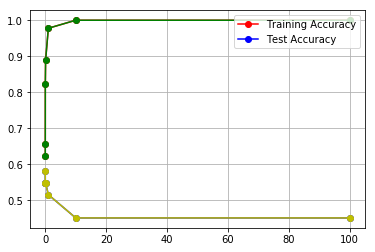

In [21]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

# X without weight
print('X without weight:')
for i in range(len(c)):
    svm_polynomial(c[i], X_withoutSTD_train, X_withoutSTD_test, Y_withoutSTD_train, Y_withoutSTD_test, acc_train_svm_poly, acc_test_svm_poly, c_svm_poly)
    
acc_train_svm_poly2 = []
acc_test_svm_poly2 = []
c_svm_poly2 = []

# X with weight
print('X with weight:')
for i in range(len(c)):
    svm_polynomial(c[i], X_withSTD_train, X_withSTD_test, Y_withSTD_train, Y_withSTD_test, acc_train_svm_poly2, acc_test_svm_poly2, c_svm_poly2)
    
plt.plot(c_svm_poly, acc_train_svm_poly, 'ro-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'bo-') 
plt.plot(c_svm_poly, acc_train_svm_poly2, 'go-') 
plt.plot(c_svm_poly, acc_test_svm_poly2,'yo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')